## 1. 약수의 합

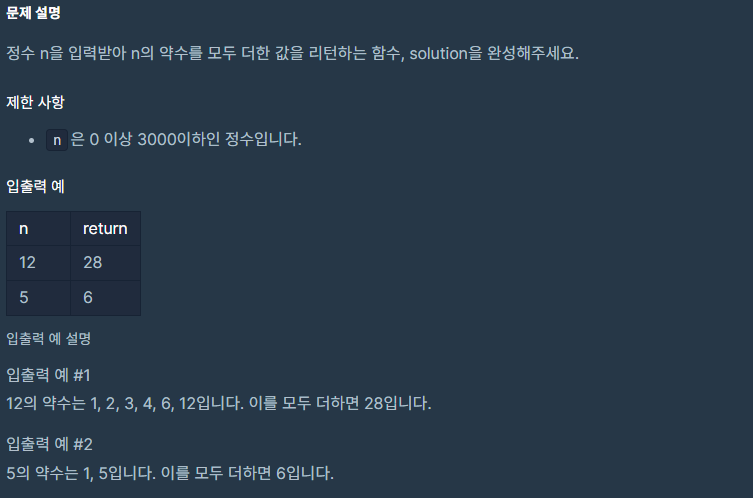

In [ ]:
import time 

start = time.time()


def solution(n):
# 답안 작성 부분 ===============
    answer =[]
    for i in range(1,n+1):
        if n%i==0:
            answer.append(i)
    answer = sum(answer)        





# ==============================

    return answer

print(solution(12))
print(solution(5))

end = time.time()

print("작동시간:", f"{end - start:.5f} sec")

## 2. 문자열 내 p와 y의 개수

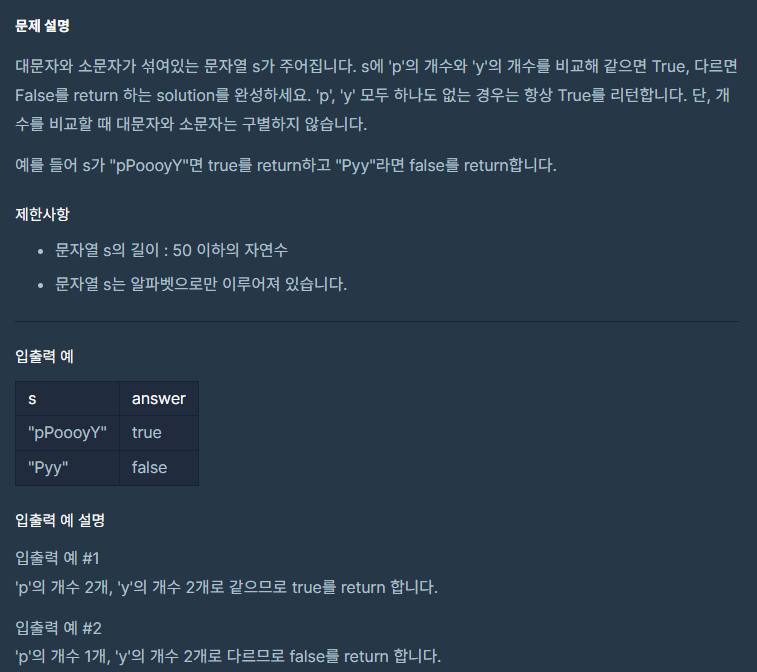

In [ ]:
import time 

start = time.time()


def solution(n):
# 답안 작성 부분 ===============
    if n.lower().count('p')== n.lower().count('y'):
        return True
    else:
        return False

# ==============================

    return answer

print(solution("pPoooyY"))
print(solution("Pyy"))

end = time.time()

print("작동시간:", f"{end - start:.5f} sec")

## 3. 크기가 작은 부분 문자열


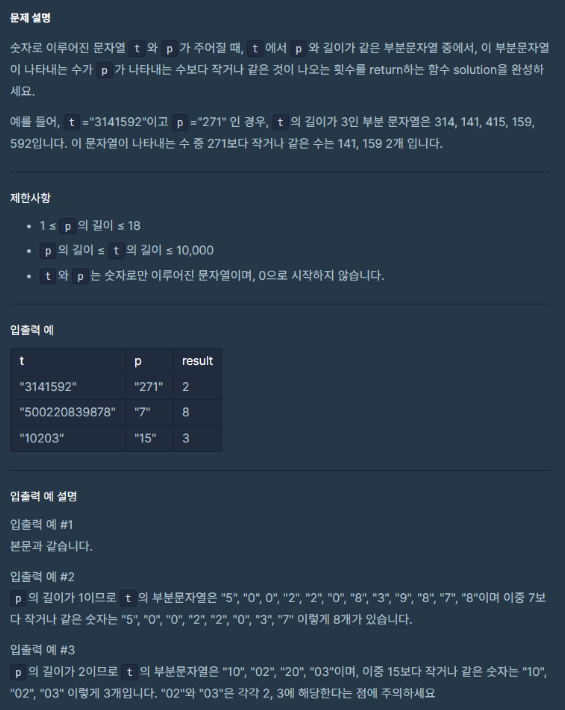

In [ ]:
import time 

start = time.time()

def solution(t, p):
# 답안 작성 부분 ===============
    len_t = len(t)
    len_p = len(p)

    answer = 0
    p=int(p)
    for i in range(0,len_t+1-len_p): # 7자리글자가 3번씩 1shift 하면 총 5번이 나오기 때문에
        if int(t[i:i+len_p]) <= p:
            answer+=1




# ==============================

    return answer

print(solution("3141592", "271"))
print(solution("500220839878", "7"))
print(solution("10203", "15"))

end = time.time()

print("작동시간:", f"{end - start:.5f} sec")

## 4. x만큼 간격이 있는 n개의 숫자

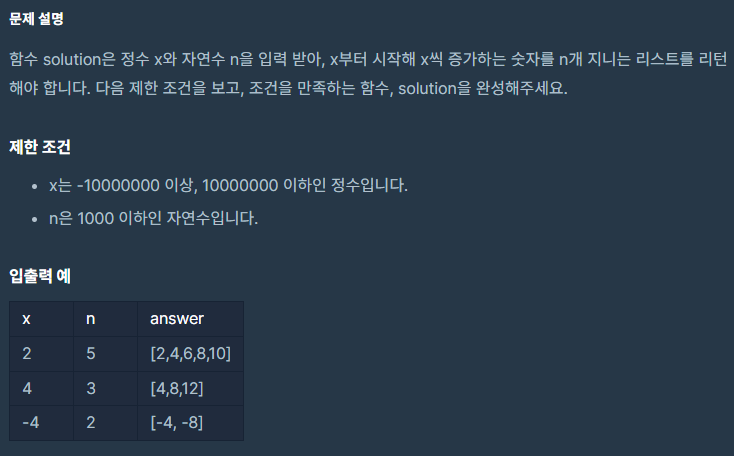

In [ ]:
import time 

start = time.time()


def solution(x, n):
# 답안 작성 부분 ===============
    answer = []
    n=int(n)
    for i in range(1,n+1):
        answer.append(i*x)
# ==============================

    return answer

print(solution(2, 5))
print(solution(4, 3))
print(solution(-4, 2))

end = time.time()

print("작동시간:", f"{end - start:.5f} sec")

## 5. 멘토 제안 문제: 1번은 가산점(총100점) 2번은 필수로 풀이!!!

# ※ 1번만 인터넷 검색 가능
### 1. 캐글, 데이콘에서 많이 쓰이는 k-fold의 예시입니다. k-fold에 대해 설명을 쓰고(20점), 아래 코드에서 #주석기입이라고 쓰인 부분은 각 아래 해당 코드를 설명하는 주석으로 바꿔주세요 (각 8점)

In [ ]:
# 13점
# k-fold 설명: K 개의 데이터 폴드 세트를 만들어서 K 번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법이다.



In [ ]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

def load_dataset():
	
    #주석기입
	(trainX, trainY), (testX, testY) = mnist.load_data()
	#mnist 데이터를 train, test load 하는 작업
    
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	
    #주석기입
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
	# 클래스 벡터를 이진 클래스로 변환하는 작업

def prep_pixels(train, test):
	
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	
    #주석기입
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# nomalization 정규화 작업 (동일한 스케일로 반영되도록)
	return train_norm, test_norm


def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
 
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))

	opt = SGD(learning_rate=0.01, momentum=0.9)
 
    #주석기입
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
	#model 컴파일 과정 : 옵티마이저 = opt , loss = 이진분류이기때문에 categorical_crossentropy , metrics = 정확도를 보겠다
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()

    #주석기입
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	#kfold n_folds개의 데이터를 랜덤으로 셔플하여 검증을 하겠다 랜덤스테이트는 시드값을 정하는 용도
    #주석기입
	for train_ix, test_ix in kfold.split(dataX):

		model = define_model()
        
        #주석기입
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		#데이터  스플릿
        #주석기입
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		#모델 핏 에폭10 , 배치32, 검증데이터 ,verbose =0 은 출력하지 않는다
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))

        #주석기입
		scores.append(acc)
        #정확도를 스코어 에 넣어준다
        #주석기입
		histories.append(history)
		#모델 핏 결과를 histories 에 넣어준다
	return scores, histories

def run_test_harness():
	
	trainX, trainY, testX, testY = load_dataset()
	
	trainX, testX = prep_pixels(trainX, testX)
	
	scores, histories = evaluate_model(trainX, trainY)

run_test_harness()

## 2. 정수 제곱근 판별

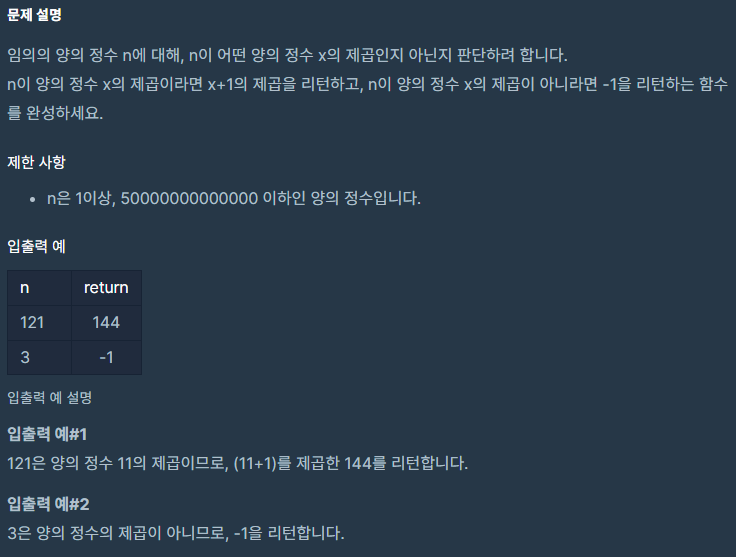

In [ ]:
sq=144
total=sq**(1/2)
print(int(total))

In [ ]:
import time 

start = time.time()


def solution(n):
# 답안 작성 부분 ==================
    answer = int(n**(1/2))

    if n%answer==0:
        answer = answer+1
        return  answer**2
    else:
        return -1
# ==============================

  


end = time.time()

print(solution(121))
print(solution(3))

print("작동시간:", f"{end - start:.5f} sec")